In [1]:
import pandas as pd
import numpy as np
import os
os.chdir('../../../../')
print(os.getcwd())
from v2.strategy.indicators.optimal_v2 import Optimal_v2
from v2.model import Trading
from v2.strategy.indicators.param import Param





/mnt/c/Users/jam60/OneDrive/Repos/vivaldi/back_testing


In [2]:
def load_config():
    my_config = {}
    with open('config.config') as config:
        for line in config:
            args = line.split('=')
            my_config[args[0]] = args[1].rstrip().split(',')
    return my_config

model = Trading(load_config())
dataset = model.dfs[0][0]

In [3]:

optimal = Optimal_v2(_params=[], _name='optimal')
optimal.genData(dataset, gen_new_values=False)

In [4]:
def map_to_price_entry(row):
    if row.optimal > 0.9:
        return row.close
    else:
        return None

def map_to_price_exit(row):
    if row.optimal < -0.9:
        return row.close
    else:
        return None

In [5]:
dataset['optimal_entry'] = dataset.apply(lambda x: map_to_price_entry(x), axis=1)
dataset['optimal_exit'] = dataset.apply(lambda x: map_to_price_exit(x), axis=1)

In [6]:
dataset['close'].isnull().values.any()

False

In [7]:
dataset

,time,open,high,low,close,volume,trades,optimal,optimal_entry,optimal_exit
3428786,1586822460,6872.0,6881.0,6872.0,6880.400000,5.806000,21,0.854167,NaN,NaN
3428787,1586822520,6880.4,6881.1,6880.4,6880.866667,2.245397,6,0.000000,NaN,NaN
3428788,1586822580,6882.8,6889.0,6881.4,6883.628571,6.518462,13,0.000000,NaN,NaN
3428789,1586822640,6885.4,6890.0,6885.4,6887.026667,12.893542,7,-0.854167,NaN,NaN
3428790,1586822700,6890.0,6890.0,6880.1,6883.451613,3.551707,23,0.000000,NaN,NaN
3428791,1586822760,6880.0,6880.0,6867.8,6875.501587,0.663428,16,0.000000,NaN,NaN
3428792,1586822820,6867.8,6877.0,6867.8,6875.148031,3.445165,18,0.000000,NaN,NaN
3428793,1586822880,6876.0,6876.0,6875.0,6875.073725,0.769753,8,0.000000,NaN,NaN
3428794,1586822940,6875.1,6875.1,6871.1,6873.433659,3.092776,13,0.791667,NaN,NaN
3428795,1586823000,6872.9,6876.2,6872.9,6874.517889,19.610076,24,0.000000,NaN,NaN


<Figure size 432x288 with 0 Axes>

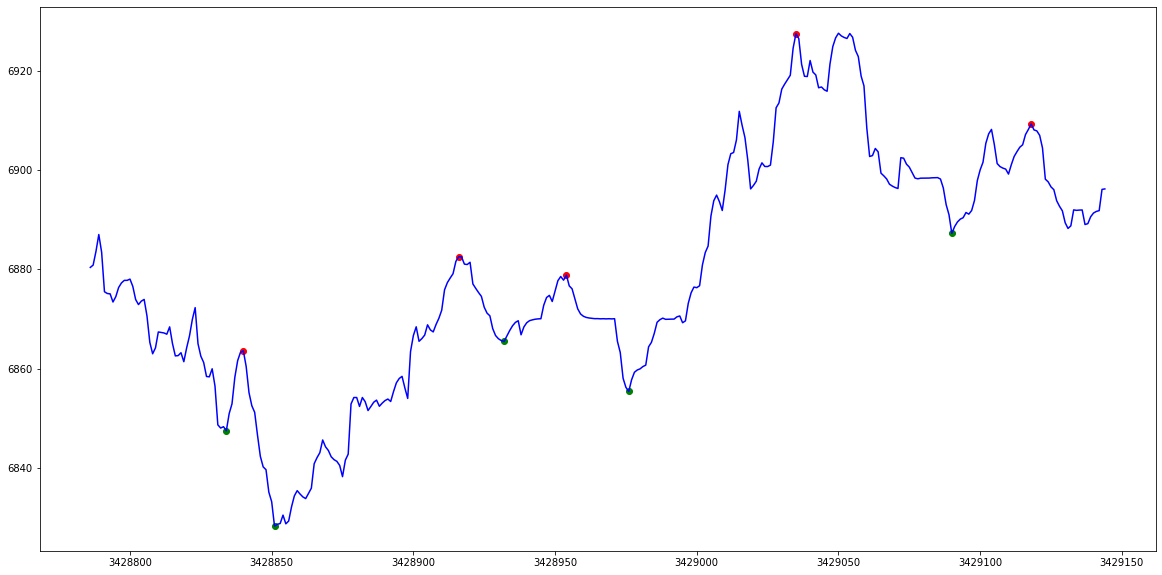

In [8]:
import matplotlib.pyplot as plt
plt.clf()
plt.figure(figsize=(20,10))
plt.scatter(x=dataset.index, y=dataset['optimal_entry'], color='green')
plt.scatter(x=dataset.index, y=dataset['optimal_exit'], color='red')

plt.plot(dataset.index, dataset['close'], color='blue')
plt.show()